<a href="https://colab.research.google.com/github/1dhiman/100days-ml/blob/master/2019/intermediate_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

A simple plot:

- Create a `Figure` and an `Axes`
- Plot your data into the `Axes`

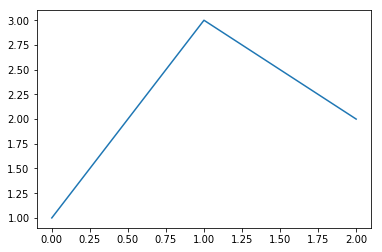

In [2]:
fig, ax = plt.subplots()
ax.plot([1, 3, 2]);

### Basic elements of a plot

- **Figure**: The outermost container for a matplotlib graphic.
- **Axes**: A container for as single plot (line or scatter plot (y vs. x), a pseudo-color plot, etc.)
- **Axis**: Direction with a scale. (*Note:* This is *not* the line.)
- **Spines**: Axis lines.
- **Artist**: Visible elements on the canvas: Lines, Rectangles, Text, Ticks, Axes, ...
  
Let's highlight the respective parts of the plot:

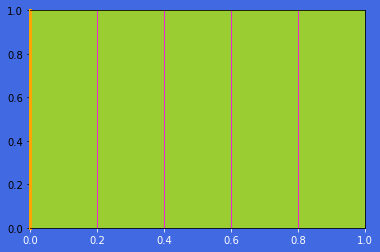

In [3]:
fig, ax = plt.subplots()
fig.set_facecolor('royalblue')
ax.set_facecolor('yellowgreen')
ax.xaxis.set_tick_params(colors='white', gridOn=True, grid_color='fuchsia')
ax.spines['left'].set_color('orange')
ax.spines['left'].set_linewidth(3)

In [0]:
import numpy as np

# prepare some data
N = 100
t = np.linspace(0, 60, N)
temperature = 0.008 *t + 0.1 * np.random.random(N) + 23

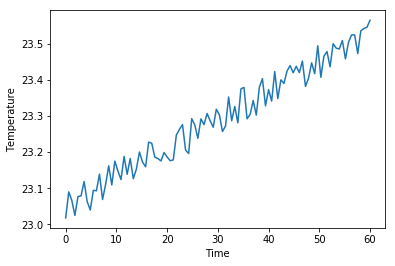

In [5]:
# create a figure and one or more axes
fig, ax = plt.subplots()

# draw the data into the axes
ax.plot(t, temperature)

# configure further plot properties
ax.set_xlabel('Time')
ax.set_ylabel('Temperature');

### Figure and Subplots

<class 'numpy.ndarray'> (2,)


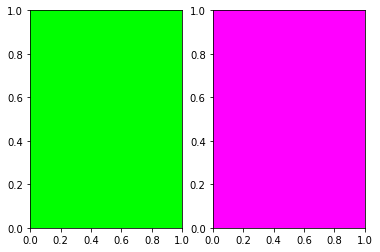

In [6]:
fig, axs = plt.subplots(1, 2)
print(type(axs), axs.shape)
axs[0].set_facecolor('lime')
axs[1].set_facecolor('fuchsia')

<class 'numpy.ndarray'> (2, 2)


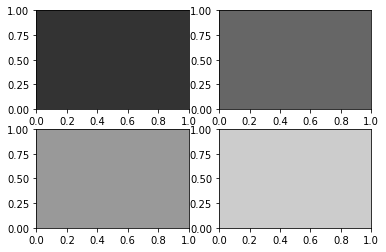

In [7]:
fig, axs = plt.subplots(2, 2)
print(type(axs), axs.shape)
axs[0, 0].set_facecolor('0.2')
axs[0, 1].set_facecolor('0.4')
axs[1, 0].set_facecolor('0.6')
axs[1, 1].set_facecolor('0.8')

**Tuple unpacking** can be used to assign the returned axes to single variables.

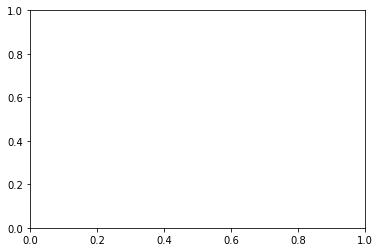

In [8]:
fig, ax = plt.subplots()

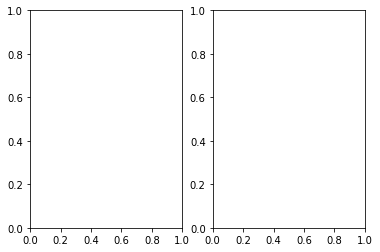

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)

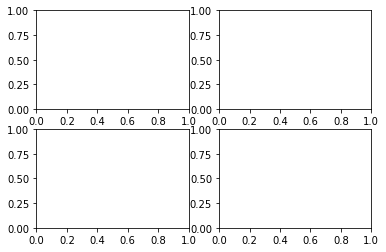

In [10]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2)

Using `axs.flat`

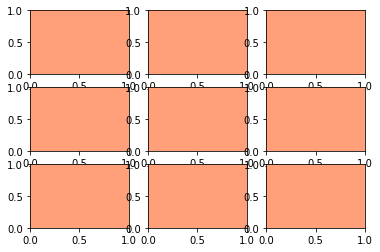

In [11]:
fig, axs = plt.subplots(3, 3)
for ax in axs.flat:
    ax.set_facecolor('lightsalmon')

### Figure size

`figsize = (width, height)` determines the dimensions of the figure in inches.

Default size: [6. 4.]


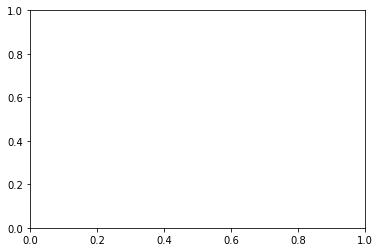

In [12]:
fig, ax = plt.subplots()
print('Default size:', fig.get_size_inches())

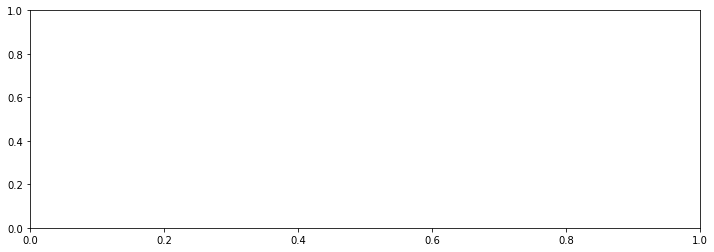

In [13]:
fig, ax = plt.subplots(figsize=(12, 4))

### Excusion: Exact figure size

For pixel-based backends `figsize * dpi` is the actual size in pixels.

Let's make the figure the pysically correct size on the screen.

In [14]:
resolution = 1920, 1080  # pixels
diagonal = 13.3  # inches

import numpy as np
rx, ry = resolution
dpi = np.sqrt(rx**2 + ry**2) / diagonal
print(dpi)

165.6321180513006


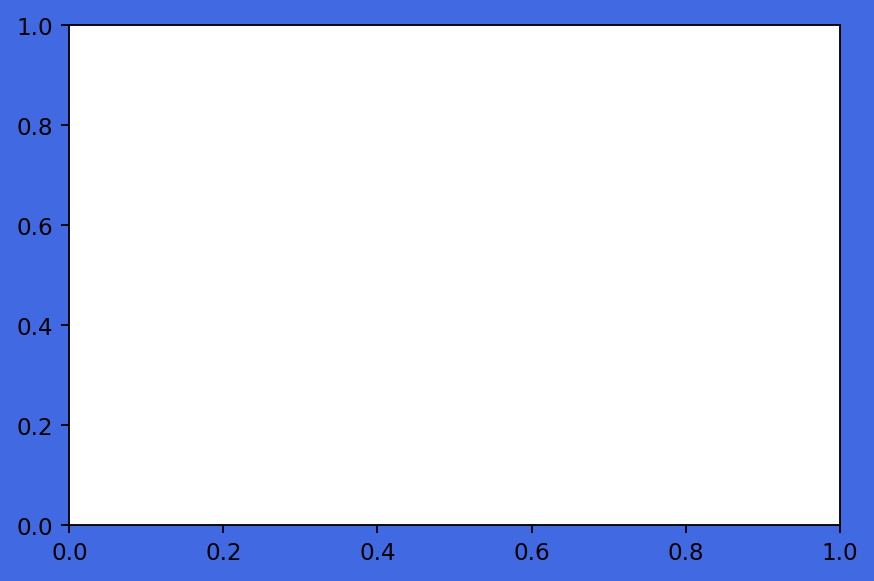

In [15]:
fig, ax = plt.subplots(dpi=dpi, facecolor='royalblue')

The inline backend is trying to be smart and cuts of unused space around the axes ('tight' layout). Let's deactivate that:

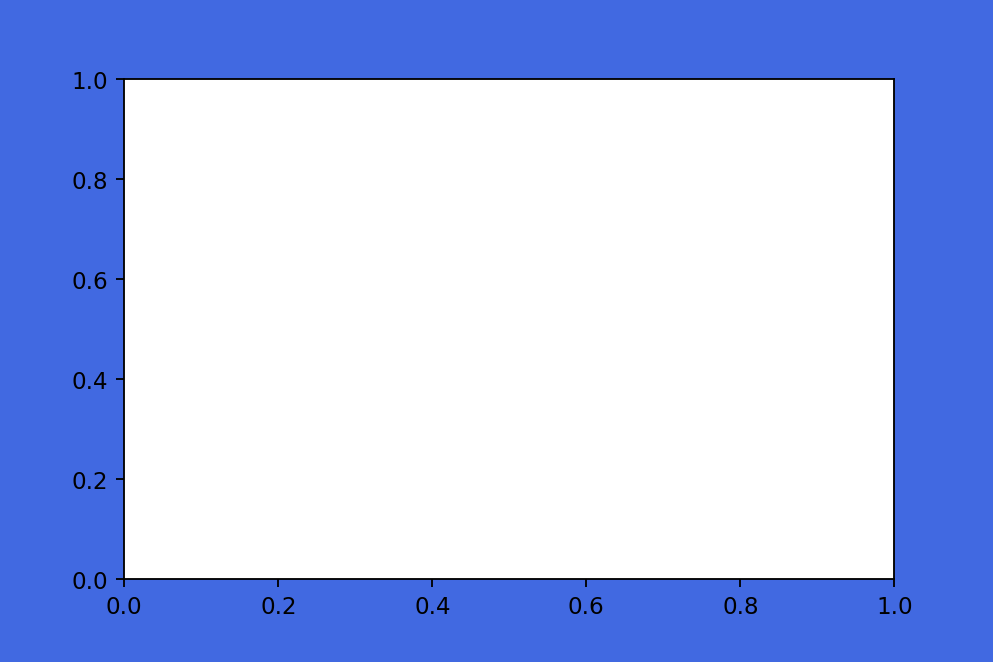

In [16]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

fig, ax = plt.subplots(dpi=dpi, facecolor='royalblue')

In [0]:
# reactivate the tight layouting
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}

TIP: use `dpi=100`

### `figsize` and fonts

Font sizes are in points. They are not affected by `figsize`.

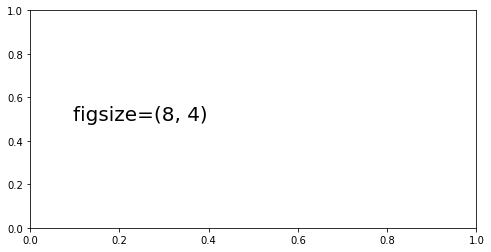

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.text(0.2, 0.5, 'figsize=(8, 4)', fontsize=20);

Text(0.2, 0.5, 'figsize=(8, 4)')

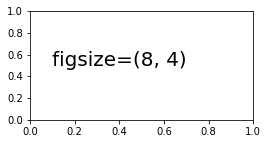

In [19]:
fig, ax = plt.subplots(figsize=(4, 2))
fig.text(0.2, 0.5, 'figsize=(8, 4)', fontsize=20)

## Layouting: Constrained Layout

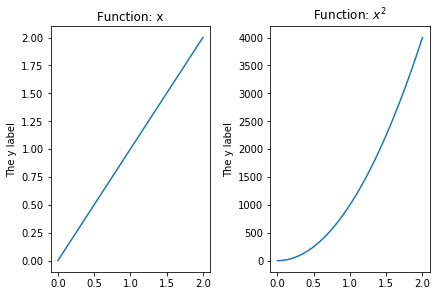

In [20]:
x = np.linspace(0, 2, 201)
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)
ax1.plot(x, x)
ax2.plot(x, 1000*x**2)
ax1.set_title('Function: x')
ax2.set_title('Function: $x^2$')
ax1.set_ylabel('The y label')
ax2.set_ylabel('The y label');

# Adding content

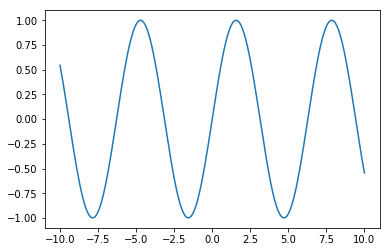

In [21]:
x = np.linspace(-10, 10, 201)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y);

## Explicit styling with color, marker and linestyle

A format string consists of a part for color, marker and line:

~~~
fmt = '[marker][line][color]'
~~~

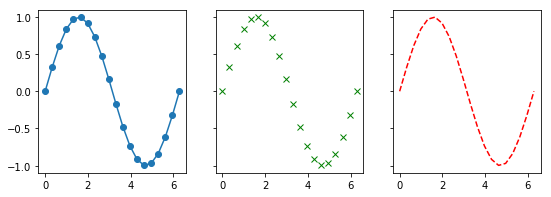

In [22]:
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
ax1.plot(x, y, 'o-')
ax2.plot(x, y, 'gx')
ax3.plot(x, y, 'r--');

Create the same plot but using keyword arguments `marker`, `linestyle` and `color` instead of the format string.

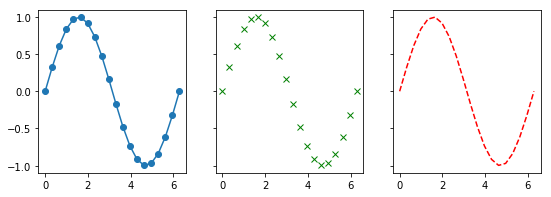

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
ax1.plot(x, y, marker='o')
ax2.plot(x, y, marker='x', linestyle='none', color='green')
ax3.plot(x, y, marker='', linestyle='--', color='red');

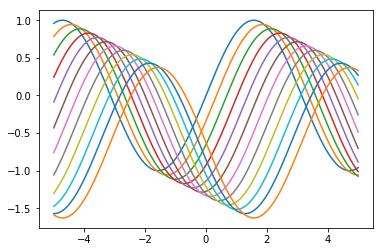

In [24]:
x = np.linspace(-5, 5, 201)
for dx in np.linspace(0, np.pi, 12):
    plt.plot(x, np.sin(x - dx) - 0.2 * dx)

## Colors

`CN` color notation is in particular useful for relating additional plot elements with the data.

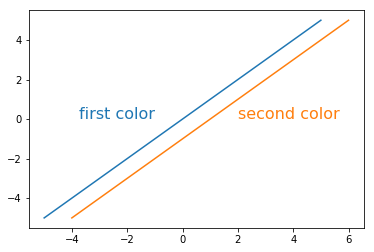

In [25]:
plt.plot(x, x)
plt.plot(x+1, x)

plt.text(-1, 0, 'first color', color='C0', fontsize=16, horizontalalignment='right')
plt.text(2, 0, 'second color', color='C1', fontsize=16);

### Legend

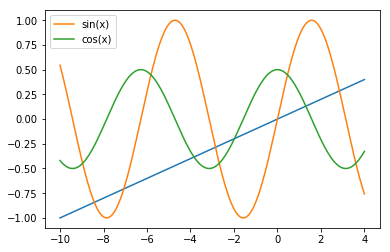

In [26]:
x = np.linspace(-10, 4, 201)
line, = plt.plot(x, 0.1*x)
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, 0.5*np.cos(x), label='cos(x)')
#line.set_label('x')
plt.legend();

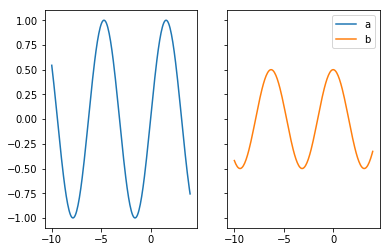

In [27]:
# Explicitly defining legend content

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
line1, = ax1.plot(x, np.sin(x))
line2, = ax2.plot(x, 0.5 * np.cos(x), 'C1')

ax2.legend([line1, line2], ['a', 'b']);

## Categorical bar plots

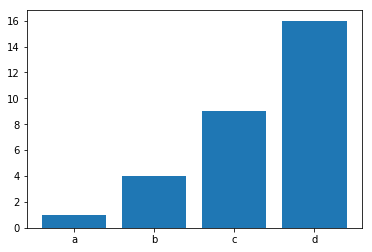

In [28]:
# recommended: pass labels as x
x = np.arange(1, 5)
labels = ['a', 'b', 'c', 'd']
plt.bar(labels, x**2);

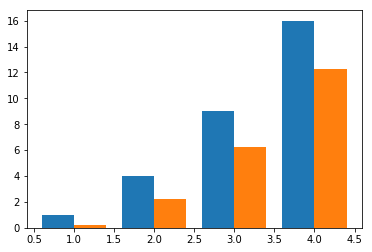

In [29]:
plt.bar(x-0.2, x**2, width=0.4)
plt.bar(x+0.2, (0.5-x)**2, width=0.4);

# Configuration and Styles

### Changing appearance defaults

can change default of many visual properties, which are contained in the config dictionary `rcParams`.

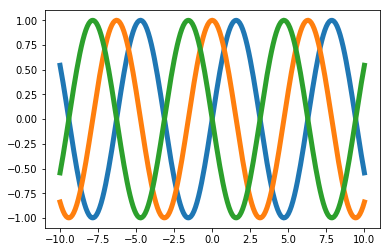

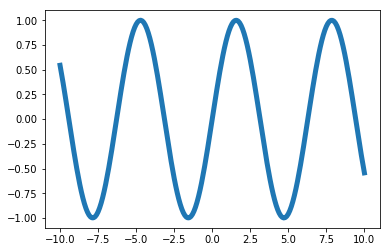

In [32]:
x = np.linspace(-10, 10, 201)

plt.rcParams['lines.linewidth'] = 5  # Not recommended: Changes the global state and thus affects future plots (use a context instead - see below)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.plot(x, -np.sin(x))
plt.show()

plt.plot(x, np.sin(x))

In [0]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

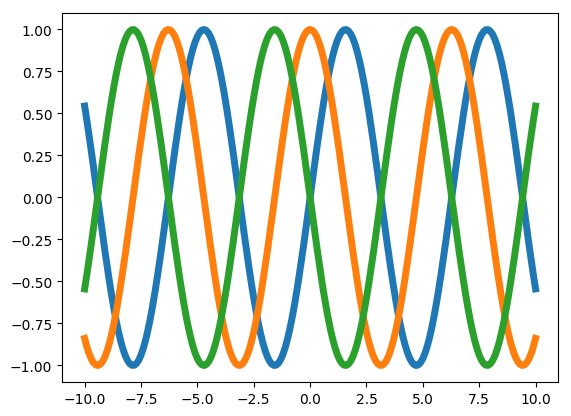

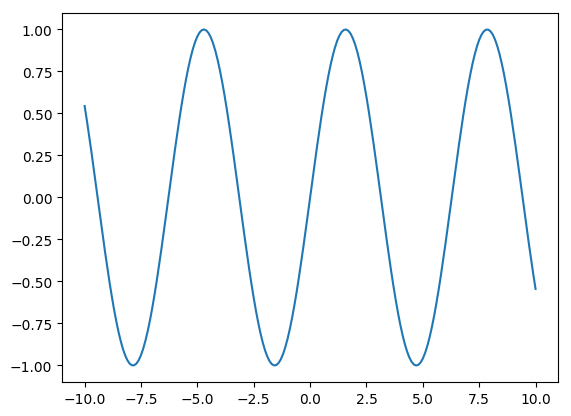

In [35]:
with plt.rc_context({'lines.linewidth': 5}):
    plt.plot(x, np.sin(x))
    plt.plot(x, np.cos(x))
    plt.plot(x, -np.sin(x))
    plt.show()

plt.plot(x, np.sin(x))

## Available rcParams

In [37]:
plt.rcParams

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

You can use `rcParams.find_all()` to display the subset of parameters matching a string.

In [38]:
plt.rcParams.find_all('marker')

RcParams({'boxplot.flierprops.marker': 'o',
          'boxplot.flierprops.markeredgecolor': 'black',
          'boxplot.flierprops.markerfacecolor': 'none',
          'boxplot.flierprops.markersize': 6.0,
          'boxplot.meanprops.marker': '^',
          'boxplot.meanprops.markeredgecolor': 'C2',
          'boxplot.meanprops.markerfacecolor': 'C2',
          'boxplot.meanprops.markersize': 6.0,
          'legend.markerscale': 1.0,
          'lines.marker': 'None',
          'lines.markeredgecolor': 'auto',
          'lines.markeredgewidth': 1.0,
          'lines.markerfacecolor': 'auto',
          'lines.markersize': 6.0,
          'markers.fillstyle': 'full',
          'scatter.marker': 'o'})

## Style Sheets

Style sheets are predefined sets of rcParams.

https://matplotlib.org/devdocs/tutorials/introductory/customizing.html

https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html

In [39]:
plt.style.available

['grayscale',
 'seaborn-dark-palette',
 'classic',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-pastel',
 'seaborn-white',
 'seaborn-paper',
 'bmh',
 'ggplot',
 'seaborn-ticks',
 'seaborn-poster',
 'seaborn',
 'Solarize_Light2',
 'fivethirtyeight',
 'seaborn-talk',
 'seaborn-colorblind',
 'seaborn-deep',
 'seaborn-whitegrid',
 'tableau-colorblind10',
 'seaborn-notebook',
 'fast',
 'seaborn-bright',
 '_classic_test',
 'dark_background',
 'seaborn-muted']

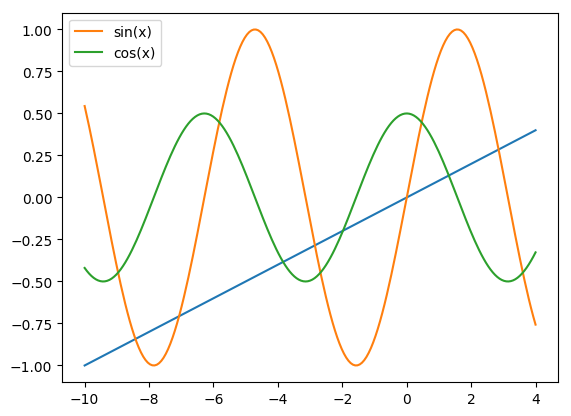

In [40]:
plt.style.use('default')
#plt.style.use('seaborn')
x = np.linspace(-10, 4, 201)
plt.plot(x, 0.1*x)
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, 0.5*np.cos(x), label='cos(x)')
plt.legend()

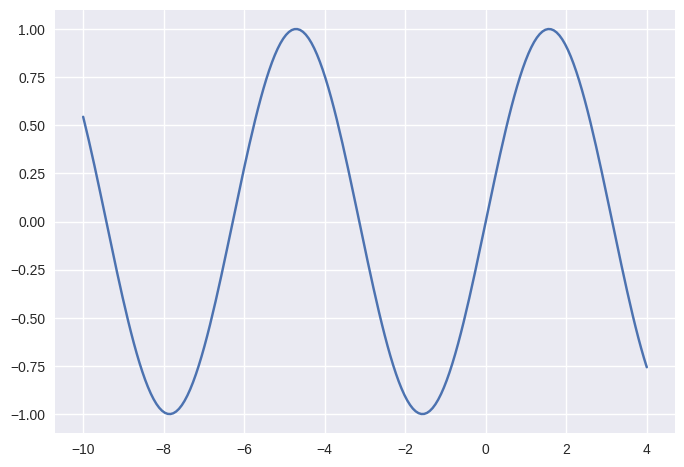

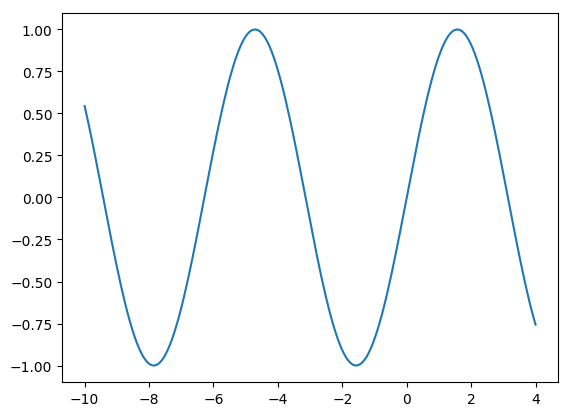

In [41]:
y = np.sin(x)

with plt.style.context('seaborn'):
    plt.plot(x, y)
    plt.show()

plt.plot(x, y)

# Other libraries using Matplotlib

- Matplotlib provides building blocks and configuration capabilities to adapt a plot completely to your needs.
- That's usually a couple of lines of code.
- Providing ready made domain-specific plots is beyond the scope.

There are many libraries building on top of Matplotlib https://matplotlib.org/thirdpartypackages/index.html

## Write your own wrapper function

Example: https://matplotlib.org/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html

In [0]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

(<Figure size 920x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7257bd6048>)

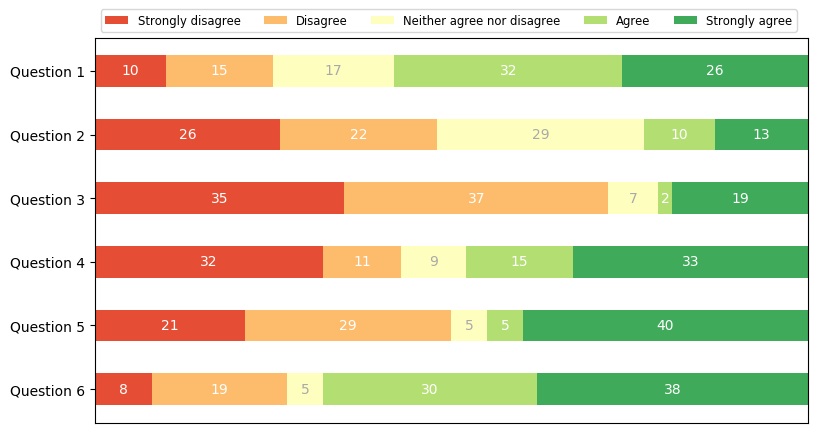

In [43]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

survey(results, category_names)

# `pandas` and matplotlib

`pandas.plot` provides a high-level plotting interface to draw content of DataFrames using Matplotllib.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
df = pd.DataFrame({'A': [1, 2, 4, 8], 'B': [4, 6, 3, 5]})

Pure Matplotlib:

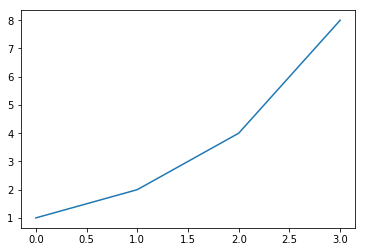

In [46]:
plt.plot(df.index, df.A)

Using `DataFrame.plot`.

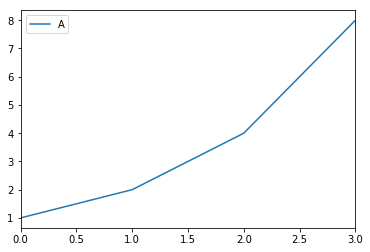

In [49]:
df.plot.line(y='A')

### Which Axes do my data go to?

Handling of Axes:

- `matplotlib.pyplot`: Plot into current axes (create one if necessary)
- `matplotlib` OOP: Explicitly create axes
- `pandas.plot`: Creates a new axes and plots into that. Alternatively, pass an existing axes via the `ax` keyword argument.

Return value:
- `matplotlib` plotting functions return the created Artist.
- `pandas.plot` plotting functions return the axes

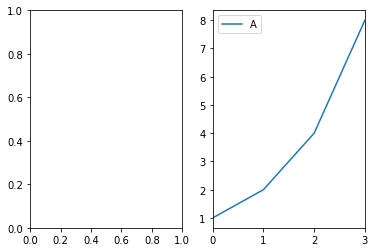

In [51]:
fig, axs = plt.subplots(1, 2)
#df.plot.line(y='A')
df.plot.line(y='A', ax=axs[1])

### Philosophies

- Matplotlib: Every aspect of the plot is configured by a separate function.
- `pandas.plot`: Convenience function to quickly draw data with some common settings.

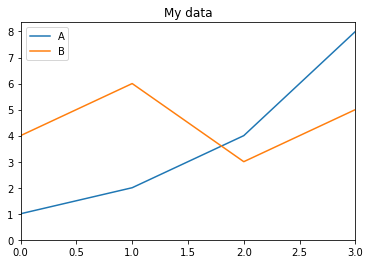

In [52]:
df.plot.line(ylim=(0, None), title='My data')

Text(0.5, 1.0, 'My data')

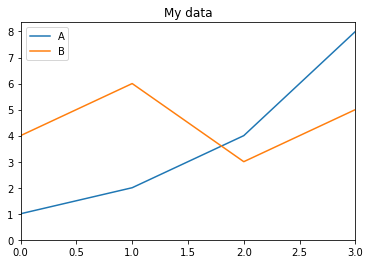

In [53]:
plt.plot(df.index, df.A, label='A')
plt.plot(df.index, df.B, label='B')
plt.ylim(0, None)
plt.xlim(0, max(df.index))
plt.legend()
plt.title('My data')

You combine both worlds:
- Use conveninece functions to draw the main part of the figure.
- Fine-tune further using Matplotlib functions.

Text(1.3, 7.2, 'Look here')

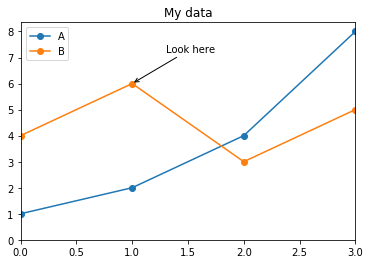

In [54]:
ax = df.plot.line(ylim=(0, None), marker='o', title='My data')
ax.annotate('Look here', (1, 6), xytext=(1.3, 7.2), arrowprops={'arrowstyle': '->'})

In [0]:
df.index = [f'Row {i}' for i in df.index]

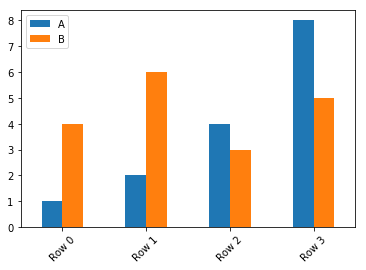

In [56]:
df.plot.bar(rot=45)

# Animations in notebooks

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML
import numpy as np

In [0]:
FRAMES = 50

x = np.linspace(0, 2*np.pi)

def f(x, phi=0):
    return np.sin(x - phi)

Animated figure:

- `FuncAnimation` generates a sequence of images from a figure.  
  Before each image the figure is updated using a callback function.
- The animation can be rendered to HTML and then embedded in IPython.

In [61]:
fig, ax = plt.subplots()
line, = ax.plot(x, f(x))

def animate(i):
    phi = 2 * np.pi * i / FRAMES
    line.set_data(x, f(x, phi))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=FRAMES)
plt.close(fig)
HTML(ani.to_jshtml(fps=20))